In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('airbnb_data_cleaned.csv')
pd.options.display.max_columns = 100

In [3]:
data.head()

,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,name_describe_host
0,0,1,1,1,1,2758,2008-09-06,In NY,within a few hours,0.70,1,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,Harlem,Manhattan,10026.0,40.799205,-73.953676,1,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",59.0,0.0,60.0,2,39.0,2,21,today,3,12,23,298,175,93.0,9.0,9.0,10.0,9.0,9.0,9.0,0,strict_14_with_grace_period,0,0,1.42,Stay at Chez Chic budget room #1 Step into our...
1,1,1,1,1,1,42032,2009-09-29,In NY,within a day,0.80,0,1.0,"['email', 'phone', 'reviews', 'kba']",1,1,Upper West Side,Manhattan,10025.0,40.797642,-73.961775,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",140.0,0.0,40.0,2,28.0,5,365,yesterday,8,8,13,248,76,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0,moderate,1,1,0.72,Light-filled classic Central Park An adorable...
2,1,1,0,0,1,2787,2008-09-07,In NY,within an hour,1.00,1,8.0,"['email', 'phone', 'reviews', 'kba']",1,1,Kensington,Brooklyn,11218.0,40.647486,-73.972370,0,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149.0,100.0,25.0,1,25.0,1,730,today,30,60,90,365,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,0.25,Clean & quiet apt home by the park Renovated a...
3,1,1,1,1,1,2845,2008-09-09,In NY,within a few hours,0.82,0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",1,1,Midtown,Manhattan,10018.0,40.753621,-73.983774,0,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225.0,350.0,100.0,2,0.0,1,1125,3 days ago,15,45,75,350,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,1,1,0.37,Skylit Midtown Castle Find your romantic getaw...
4,1,1,1,1,1,82685,2010-02-18,In NY,did not respond,0.00,0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",1,1,Harlem,Manhattan,10031.0,40.828028,-73.947308,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",89.0,100.0,30.0,1,55.0,1,60,29 months ago,30,60,90,365,1,100.0,10.0,10.0,10.0,10.0,10.0,8.0,0,strict_14_with_grace_period,0,0,0.51,"Upper Manhattan, New York A great space in a b..."


In [4]:
sns.set(style="whitegrid")

(0.0, 50000)

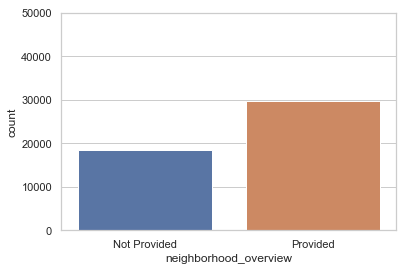

In [5]:
sns.countplot(x="neighborhood_overview", data=data)
plt.xticks([0,1],["Not Provided", "Provided"])
plt.ylim(top=50000) 

(0.0, 50000)

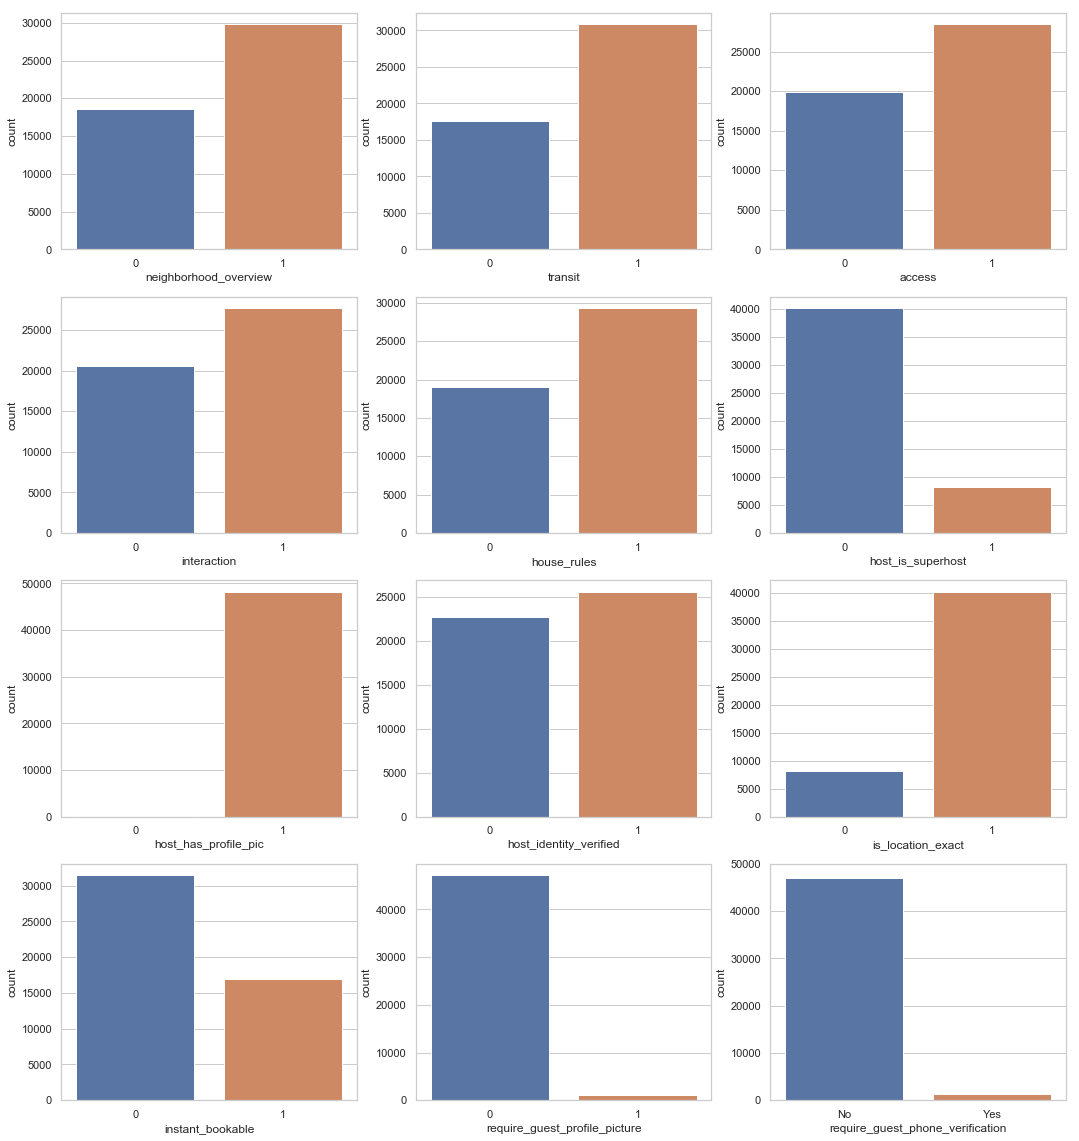

In [6]:
fig,ax = plt.subplots(4,3,figsize=(18,20))

ax1=sns.countplot(x="neighborhood_overview", data=data, ax=ax[0,0])
plt.xticks([0,1],["Not Provided", "Provided"])
plt.ylim(top=50000)

sns.countplot(x="transit", data=data, ax=ax[0,1])
plt.xticks([0,1],["Not Provided", "Provided"])
plt.ylim(top=50000)

sns.countplot(x="access", data=data, ax=ax[0,2])
plt.xticks([0,1],["Not Provided", "Provided"])
plt.ylim(top=50000)

sns.countplot(x="interaction", data=data, ax=ax[1,0])
plt.xticks([0,1],["Not Provided", "Provided"])
plt.ylim(top=50000)

sns.countplot(x="house_rules", data=data, ax=ax[1,1])
plt.xticks([0,1],["Not Provided", "Provided"])
plt.ylim(top=50000)

sns.countplot(x="host_is_superhost", data=data, ax=ax[1,2])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)

sns.countplot(x="host_has_profile_pic", data=data, ax=ax[2,0])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)

sns.countplot(x="host_identity_verified", data=data, ax=ax[2,1])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)

sns.countplot(x="is_location_exact", data=data, ax=ax[2,2])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)

sns.countplot(x="instant_bookable", data=data, ax=ax[3,0])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)

sns.countplot(x="require_guest_profile_picture", data=data, ax=ax[3,1])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)

sns.countplot(x="require_guest_phone_verification", data=data, ax=ax[3,2])
plt.xticks([0,1],["No", "Yes"])
plt.ylim(top=50000)